In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# np.set_printoptions(precision=3, floatmode='fixed')

In [32]:
rng = np.random.RandomState(0)

n_samples, n_features, n_informative = 150, 100, 10
time_step = np.linspace(-2, 2, n_samples)
freqs = 2 * np.pi * np.sort(rng.rand(n_features)) / 0.01
print("Частоты:", freqs)

Частоты: [  2.9502547   11.8059798   12.63394388  12.70359377  24.62241605
  37.84077985  40.30506066  44.63327171  54.74495357  59.02456369
  60.38041045  61.01053094  64.11664556  69.35074652  74.31401348
  74.59882593  75.52172674  81.00678191  82.81103926  86.82290896
  90.07152692  99.88353522 101.35375927 115.10252742 123.51634066
 131.24113649 132.18726166 153.57712884 159.14780755 166.22519349
 166.74913502 177.6928552  181.8392111  186.07037379 198.189478
 199.79472407 200.16277614 225.88547587 228.5262172  231.67685747
 240.92341172 260.28911604 260.53978088 266.19016105 274.59527509
 274.94415364 275.58145851 286.60770652 289.95603485 292.99169966
 294.46223444 327.88697078 328.76644816 332.31447888 342.36020095
 344.82969443 356.00619321 356.91292401 357.15758356 358.26519701
 361.87785586 368.51694545 378.72739882 380.03564828 384.59108516
 387.63106247 388.07182804 402.0742359  405.82724012 410.36006346
 412.38404332 418.94188298 419.34630932 421.37420088 428.40032855
 43

$i=0,1,\dots,99$, $k=0,1,\dots,49$

$x_k=[\sin(2\pi\alpha_1 t_k),\dots ,\sin(2\pi\alpha_n t_k)]$

$w_i = (-1)^i e^{-i/10}$

$y_k = (w,x_k)$

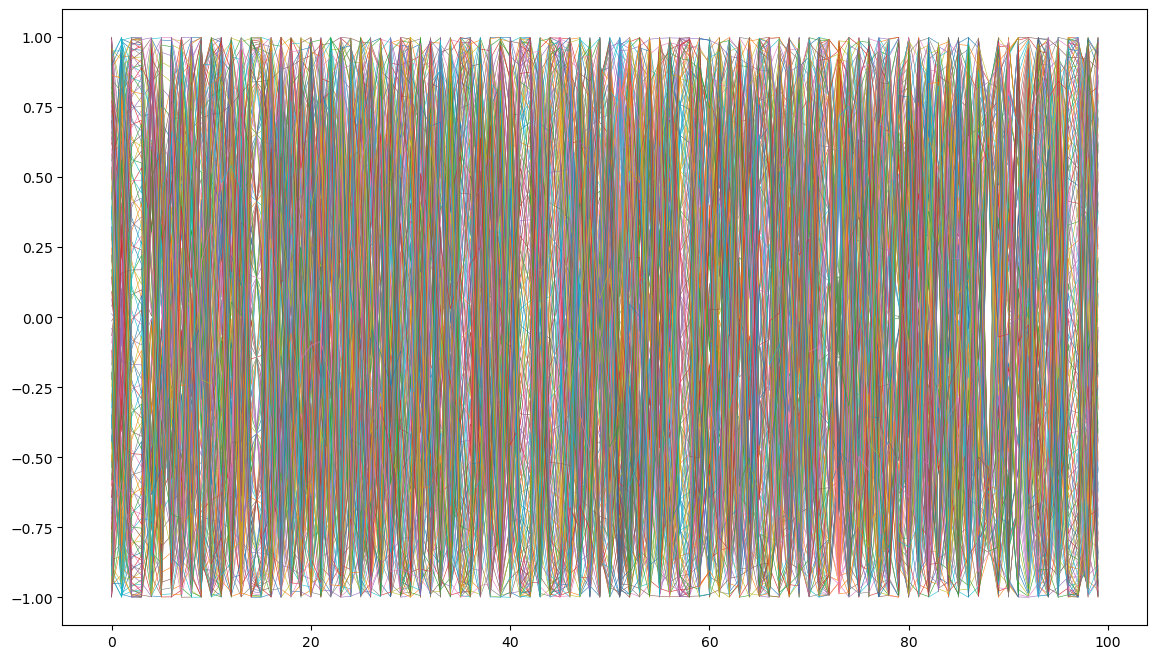

In [33]:
X = np.zeros((n_samples, n_features))

for i in range(n_features):
    X[:, i] += np.sin(freqs[i] * time_step)

plt.figure(figsize=(14,8))
for k in range(n_samples):
    plt.plot(X[k], linewidth=0.4)
plt.show()

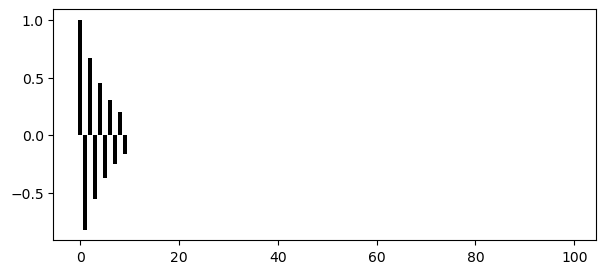

In [34]:
idx = np.arange(n_features)
true_coef = (-1) ** idx * np.exp(-idx / 5)
true_coef[n_informative:] = 0  # информативные только первые десять коэффициентов

plt.figure(figsize=(7,3))
plt.bar(range(100), true_coef, color='k')
plt.show()

Y0 = np.dot(X, true_coef)

In [35]:
Y = Y0 + 0.3 * rng.normal(0, 1, n_samples)

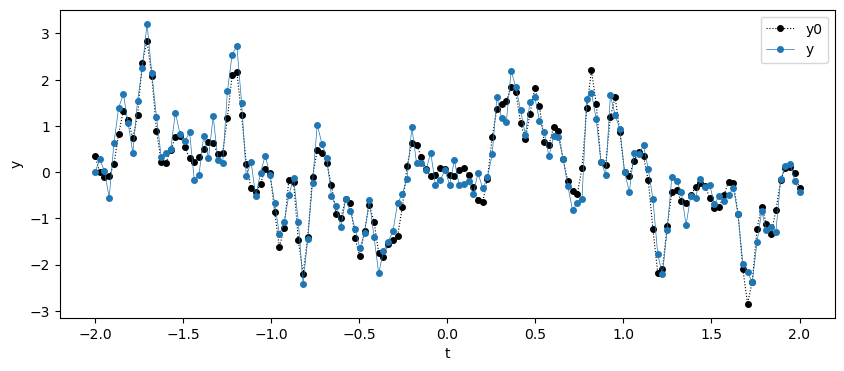

In [36]:
plt.figure(figsize=(10,4))
plt.plot(time_step, Y0, marker='o', markersize=4, color='k', linewidth=0.8, linestyle=':', label='y0')
plt.plot(time_step, Y, marker='o', markersize=4, linewidth=0.5, label='y')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

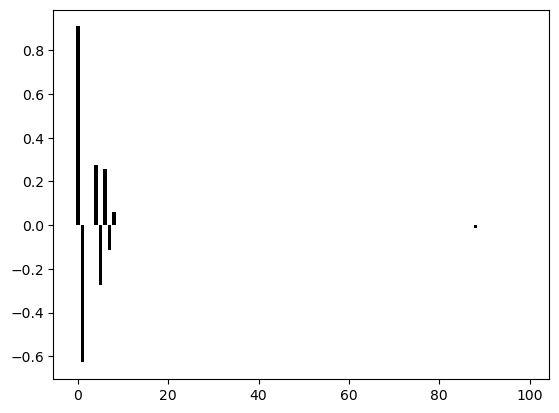

Lasso r^2: 0.889


In [44]:
from sklearn.linear_model import Lasso, lars_path
from sklearn.metrics import r2_score

lasso = Lasso(alpha=0.05, tol=0.001)
lasso.fit(X, Y)

# print(lasso.coef_)

plt.bar(range(100), lasso.coef_, color='k')
plt.show()

Y_p = lasso.predict(X)
r2_score = r2_score(Y, Y_p)
print(f"Lasso r^2: {r2_score:.3f}")

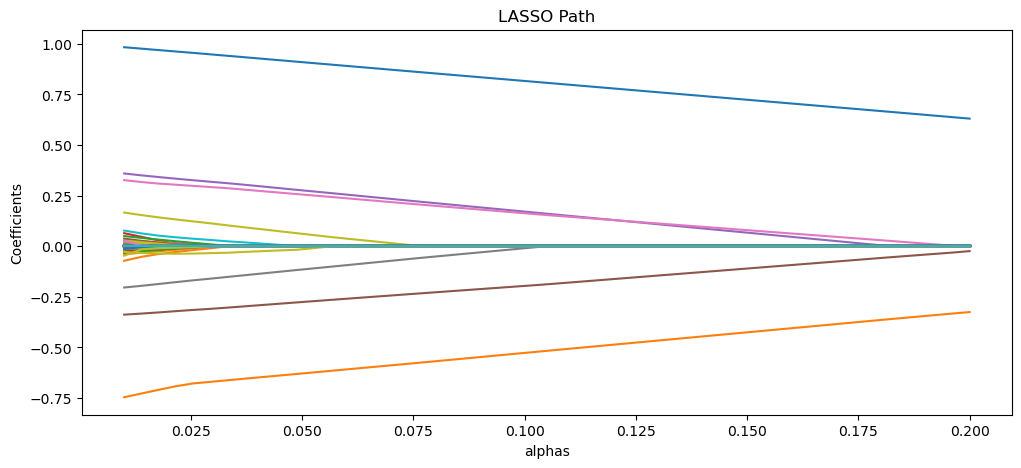

In [48]:
coef_path = []
alphas = np.linspace(0.01, 0.2, 50)
for alpha in alphas:
    lasso = Lasso(alpha=alpha, tol=0.001)
    lasso.fit(X, Y)
    coef_path.append(lasso.coef_)

coef_path = np.c_[tuple(coef_path)]

plt.figure(figsize=(12,5))
for j in range(n_features):
    plt.plot(alphas, coef_path[j,:])
plt.xlabel("alphas")
plt.ylabel("Coefficients")
plt.title("LASSO Path")

plt.show()

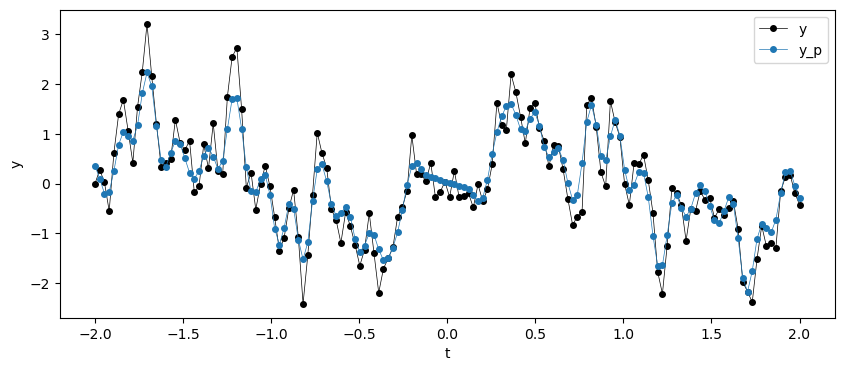

In [49]:
plt.figure(figsize=(10,4))
# plt.plot(time_step, Y0, marker='o', markersize=4, color='k', linewidth=0.8, linestyle=':', label='y0')
plt.plot(time_step, Y, marker='o', markersize=4, color='k', linewidth=0.5, label='y')
plt.plot(time_step, Y_p, marker='o', markersize=4, linewidth=0.5, label='y_p')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

In [50]:
for i in range(n_features):
    X[:, i] += 0.2 * rng.normal(0, 1, n_samples)


[ 0.80602719 -0.49875372 -0.         -0.          0.15940194 -0.15521333
  0.08259121 -0.0131442   0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.         -0.
  0.          0.         -0.         -0.          0.         -0.
 -0.          0.         -0.         -0.          0.          0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
  0.          0.         -0.          0.          0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.05033008 -0.          0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
  0.         -0.         -0.          0.         -0.         -0.
 -0.          0. 

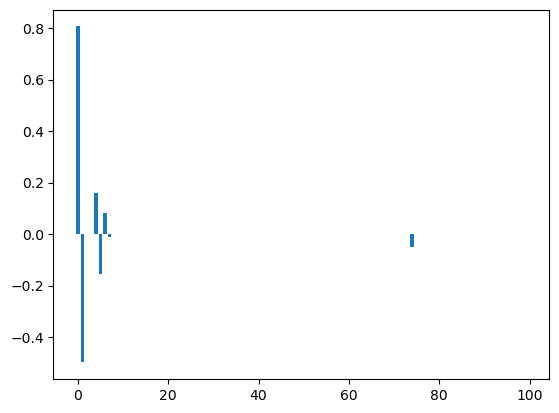

Lasso r^2 on test data : 0.813
Lasso r^2 on test data : 0.777


In [54]:
from sklearn.linear_model import Lasso 
from sklearn.metrics import r2_score

lasso = Lasso(alpha=0.1)
lasso.fit(X, Y)

print(lasso.coef_)
plt.bar(range(100), lasso.coef_)
plt.show()

Y_p = lasso.predict(X)
r2_score0 = r2_score(Y0, Y_p)
r2_score = r2_score(Y, Y_p)
print(f"Lasso r^2 on test data : {r2_score0:.3f}")
print(f"Lasso r^2 on test data : {r2_score:.3f}")

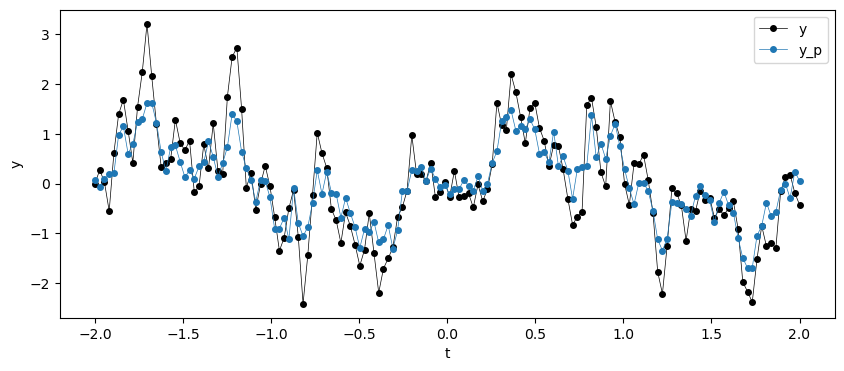

In [55]:
plt.figure(figsize=(10,4))
# plt.plot(time_step, Y0, marker='o', markersize=4, color='k', linewidth=0.8, linestyle=':', label='y0')
plt.plot(time_step, Y, marker='o', markersize=4, color='k', linewidth=0.5, label='y')
plt.plot(time_step, Y_p, marker='o', markersize=4, linewidth=0.5, label='y_p')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()